# Imports

In [1]:
from scipy.constants import g # used for gravity constant
from math import cos, sin # used for cosines and sines
import matplotlib.pyplot as plt # used for plotting

# Constants

In [2]:
dt: float = 0.0000001 # time step
v0: float = 1.0 # initial velocity
iterations: int = 11000000 # number of modelling iterations
alpha: float = 1.0 # initial angle

# Main functions

In [3]:
def get_next_velocity_y(previous_velocity: float) -> float:
    """ 
    Returns next velocity by Y axis. 
    :param previous_velocity: previous velocity by y-axis
    :return: new velocity by y-axis
    """
    
    return previous_velocity - g * dt


def get_next_velocity_x(previous_velocity: float) -> float:
    """ 
    Return next velocity by X axis.
    The speed does not change currently, because there is no forces
    opposite to the movement by x-axis. There is only gravity force that
    affects the movement only by y-axis.
    :param previous_velocity: previous velocity by x-axis
    :return: new velocity by x-axis
    """
    
    return previous_velocity


def get_next_y(previous_y: float, previous_velocity: float) -> float:
    """ 
    Returns next y coordinate.
    :param previous_y: previous y coordinate
    :param previous_velocity: previous y-component of the velocity of the object
    :return: new y coordinate
    """
    
    return previous_y + get_next_velocity_y(previous_velocity) * dt


def get_next_x(previous_x: float, 
               previous_velocity: float
               ) -> float:
    """ 
    Returns next x coordinate.
    :param previous_x: previous x coordinate
    :param previous_velocity: x-component of the velocity of the object
    :return: new x coordinate
    """
    
    return previous_x + get_next_velocity_x(previous_velocity) * dt

def flat_surface_stoppage_condition(
        current_x: float,
        current_y: float, 
        next_velocity_y: float
    ) -> bool:
    """
    Checks whether ball is contacting with the flat surface 
    (whether next ball's coordinate by y-axis is less than 0).
    :param current_x: current x coordinate of the ball
    :param current_y: current y coordinate of the ball
    :param next_velocity_y: next y-component of the velocity of the ball
    :return: True if the ball's velocity has to be changed, False otherwise
    """
    
    return get_next_y(current_y, next_velocity_y) < 0.0

def steps_stoppage_condition(
        current_x: float,
        current_y: float,
        next_velocity_y: float
    ) -> bool:
    """
    Checks whether ball is contacting with the step.
    :param current_x: 
    :param current_y: 
    :param next_velocity_y: 
    :return: True if the ball's velocity has to be changed, False otherwise
    """
    
    steps: list[tuple[float, float]] = []
    
    for i in range(6):
        x = (i + 1) / 10
        y = -i / 10
        steps.append((x, y))
        
    stop: bool = False
    
    for step in steps:
        if current_x < step[0] and current_y < step[1]:
            stop = True
            break
    
    return stop

# Modelling function

In [4]:
def model_jumping(stoppage_condition) -> list[tuple[float, float]]:
    """
    Models the movement of an absolute elastic ball jumping on flat surface.
    :param stoppage_condition: function that checks whether ball is contacting with the surface
    :return: list of coordinates of the ball, tracing its movement 
    """
    
    track: list[tuple[float, float]] = []
    
    current_x: float = 0.0
    current_y: float = 0.0
    current_velocity_x = v0 * cos(alpha)
    current_velocity_y = v0 * sin(alpha)
    
    next_x: float
    next_y: float
    next_velocity_x: float
    next_velocity_y: float
        
    for i in range(iterations):
        next_velocity_x = get_next_velocity_x(current_velocity_x)
        next_velocity_y = get_next_velocity_y(current_velocity_y)
        
        if stoppage_condition(current_x, current_y, next_velocity_y):
            next_velocity_y = -next_velocity_y
            next_y = get_next_y(current_y, next_velocity_y)
        else:
            next_y = get_next_y(current_y, next_velocity_y)
            
        next_x = get_next_x(current_x, next_velocity_x)
        
        track.append((next_x, next_y))
        
        current_x = next_x
        current_y = next_y
        current_velocity_x = next_velocity_x
        current_velocity_y = next_velocity_y
        
    return track

# Plotting functions

In [5]:
def plot_flat_surface_track(track: list[tuple[float, float]]):
    x = [pair[0] for pair in track]
    y = [pair[1] for pair in track]

    plt.plot(x, y)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axhline(y=0, color="black", linestyle="-")
        
    plt.show()
    

def plot_stairs(n):
  x_coords = []
  y_coords = []
  x = 0
  y = 0
  for i in range(n):
    x_coords.append(x)
    y_coords.append(y)
    x += 0.1
    x_coords.append(x)
    y_coords.append(y)
    y -= 0.1
  plt.plot(x_coords, y_coords, color="green", linestyle='-')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()


def plot_on_steps_track(track: list[tuple[float, float]]):
    x = [pair[0] for pair in track]
    y = [pair[1] for pair in track]

    plt.plot(x, y)
    plt.xlabel("X")
    plt.ylabel("Y")
    plot_stairs(6)

    plt.show()

# Modelling and plotting the flat surface jumping

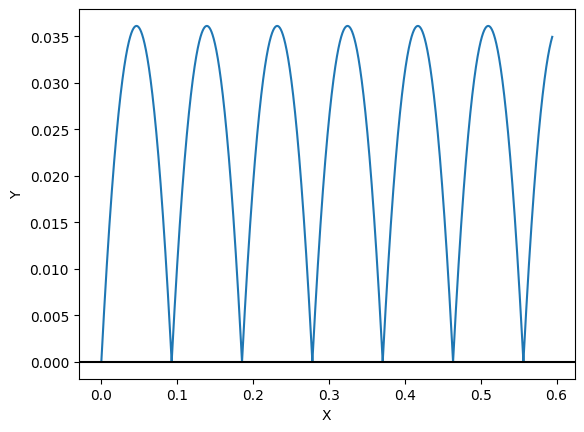

In [6]:
ball_flat_movement: list[tuple[float, float]] = model_jumping(flat_surface_stoppage_condition)

plot_flat_surface_track(ball_flat_movement)

# Modelling and plotting the jumping on steps

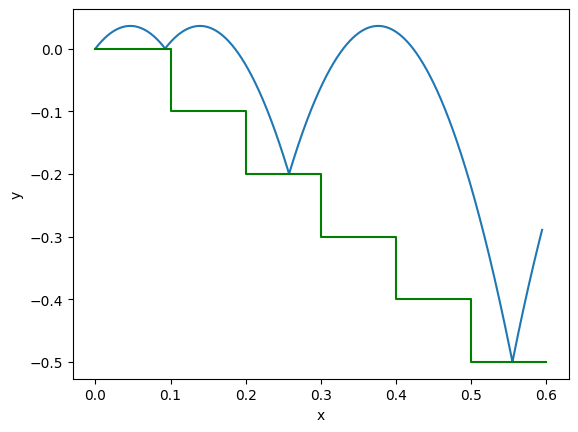

In [7]:
ball_on_steps_movement: list[tuple[float, float]] = model_jumping(steps_stoppage_condition)

plot_on_steps_track(ball_on_steps_movement)